### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data loading

df = pd.read_csv('footfalls.csv')

In [3]:
df.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Month', 'Footfalls', 't', 'log_footfalls', 't_square', 'Jan', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [5]:
df.shape

(159, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          159 non-null    object 
 1   Footfalls      159 non-null    int64  
 2   t              159 non-null    int64  
 3   log_footfalls  159 non-null    float64
 4   t_square       159 non-null    int64  
 5   Jan            159 non-null    int64  
 6   Feb            159 non-null    int64  
 7   Mar            159 non-null    int64  
 8   Apr            159 non-null    int64  
 9   May            159 non-null    int64  
 10  Jun            159 non-null    int64  
 11  Jul            159 non-null    int64  
 12  Aug            159 non-null    int64  
 13  Sep            159 non-null    int64  
 14  Oct            159 non-null    int64  
 15  Nov            159 non-null    int64  
 16  Dec            159 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 21.2

In [7]:
df.isnull().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

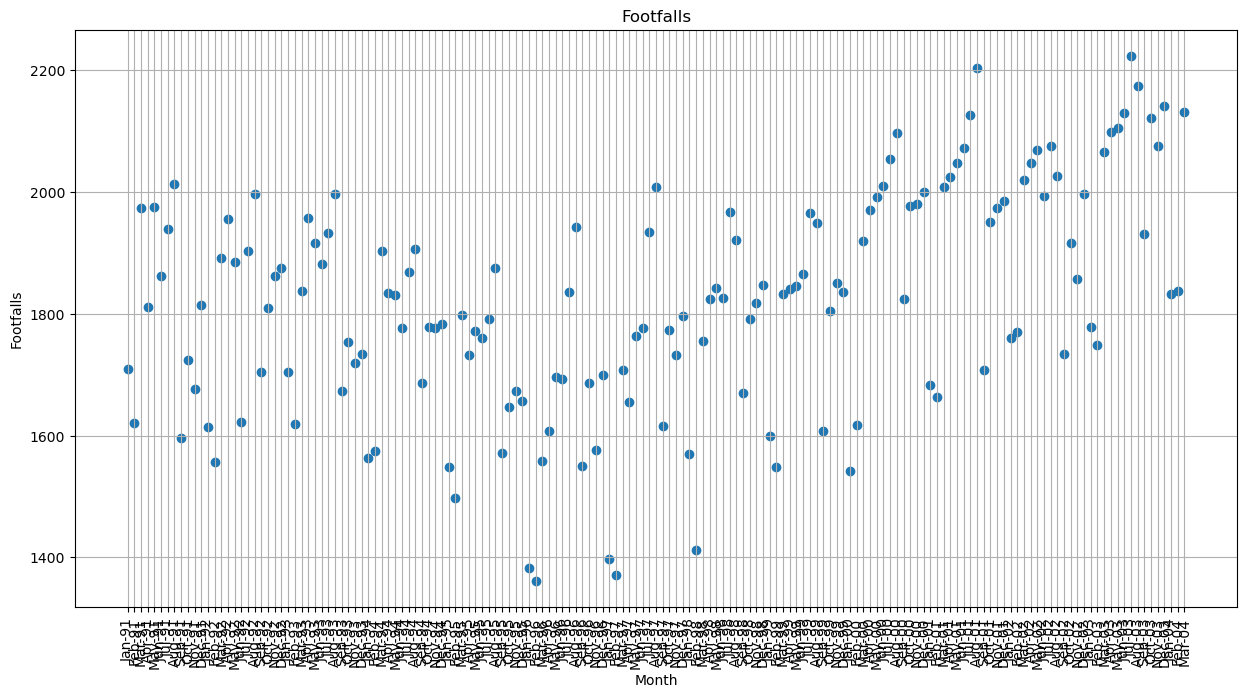

In [8]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(df['Month'], df['Footfalls'])
plt.title('Footfalls')
plt.ylabel('Footfalls')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

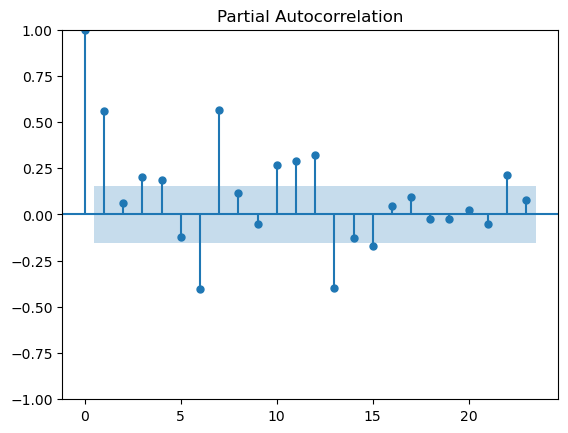

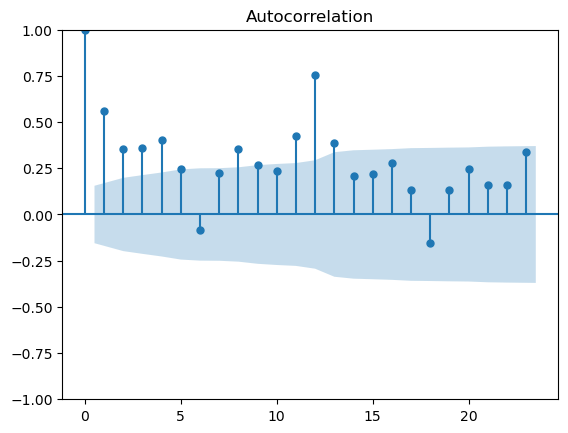

In [9]:
# lets plot acf and pacf

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_pacf(df['Footfalls']);
plot_acf(df['Footfalls']);

In [10]:
# lets prepare the data

df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)
df = df[[ 'Footfalls']]
footfalls = df['Footfalls']

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 1991-01-01 to 2004-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Footfalls  159 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [12]:
# lets check if the data is stationary
# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(df['Footfalls'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.23499112877866932
p-value: 0.9342202042969283


In [13]:
# Here, the p-value is larger than 0.05 so our data is not stationary 
# lets first make it stationary
# Take the log difference to make data stationary
df['Footfalls'] = np.log(df['Footfalls'])
df['Footfalls'] = df['Footfalls'].diff()
data = df.drop(df.index[0])
data.head()

,Footfalls
Month,
1991-02-01,-0.052865
1991-03-01,0.196512
1991-04-01,-0.085124
1991-05-01,0.086137
1991-06-01,-0.058917


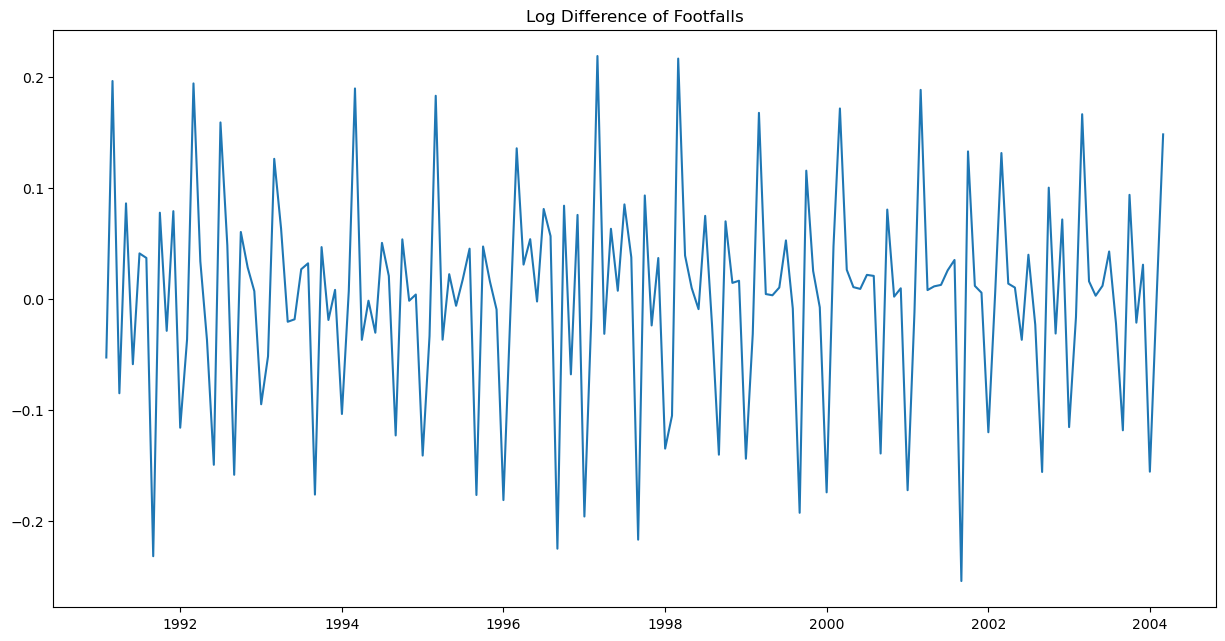

In [14]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df['Footfalls'])
plt.title("Log Difference of Footfalls")
plt.show()

In [15]:
# Augmented Dickey-Fuller test
df.dropna(inplace=True)
ad_fuller_result = adfuller(df['Footfalls'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.3251504615054395
p-value: 0.01379100258213035


In [16]:
#This time, the p-value is less than 0.05 so the data is now stationary

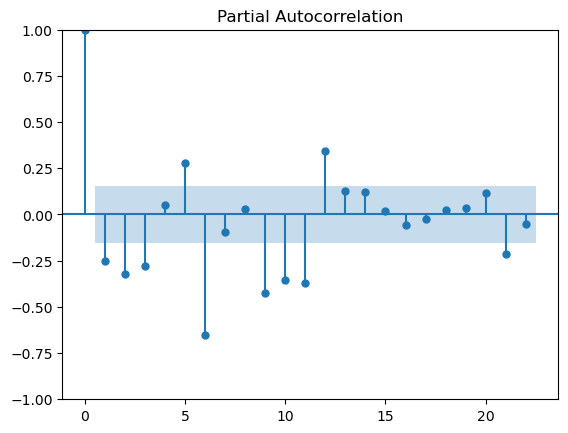

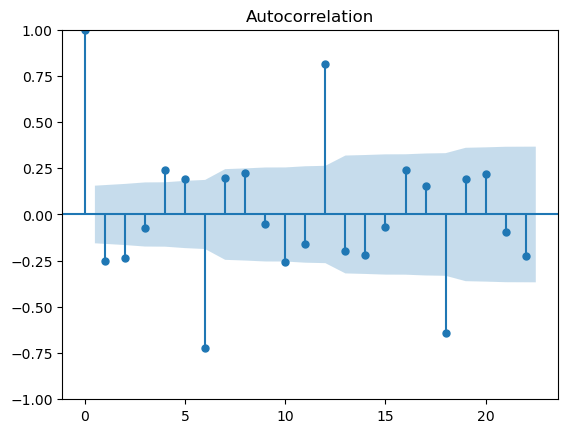

In [17]:
## lets plot acf and pacf
plot_pacf(df['Footfalls']);
plot_acf(df['Footfalls']);

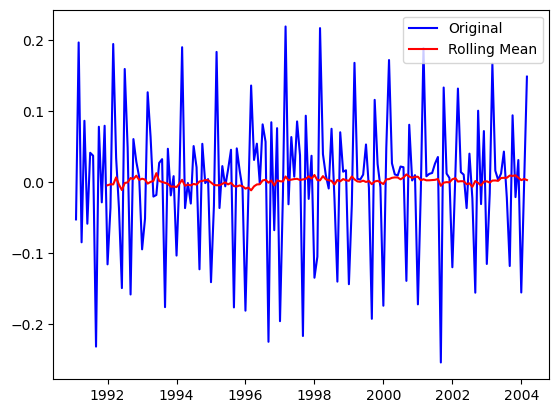

In [18]:
# Rolling mean
rolmean = df.rolling(window=12).mean()
plt.plot(df, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend()
plt.show()

In [19]:
# Split the data into training and testing sets
train_size = int(len(footfalls) * 0.7)
train, test = footfalls[:train_size], footfalls[train_size:]

In [20]:
#Model Creation
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
import itertools
from itertools import product
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

best_aic = 10000

#data = ts_s_adj
data = footfalls

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_param_seasonal = param_seasonal
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('Best ARIMA{}x{}12 - AIC:{}'.format(best_param, best_param_seasonal, best_aic))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1689.1630160144775
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1477.720850343049
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1342.0974162831603
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1514.2315859043329
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1479.291395678144
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1341.1228857347014
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1359.998835516073
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1347.508774938794
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:1337.065980207199
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1655.287123993681
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1444.5554491608157
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:1312.9811510442003
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1489.6535031604967
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1446.4068890600397
ARIMA(0, 1, 1)x(1, 1, 2, 

In [21]:
## Train SARIMA model

mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 4.970810
         Iterations: 4
         Function evaluations: 302
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4714      0.097     -4.855      0.000      -0.662      -0.281
ma.L2         -0.1601      0.091     -1.752      0.080      -0.339       0.019
ar.S.L12      -0.4247      5.076     -0.084      0.933     -10.374       9.525
ar.S.L24       0.0647      0.948      0.068      0.946      -1.793       1.923
ma.S.L12      -0.2540      5.030     -0.050      0.960     -10.112       9.605
ma.S.L24      -0.4688      4.362     -0.107      0.914      -9.019       8.081
sigma2      4072.4710    870.583      4.678      0.000    2366.159    5778.783


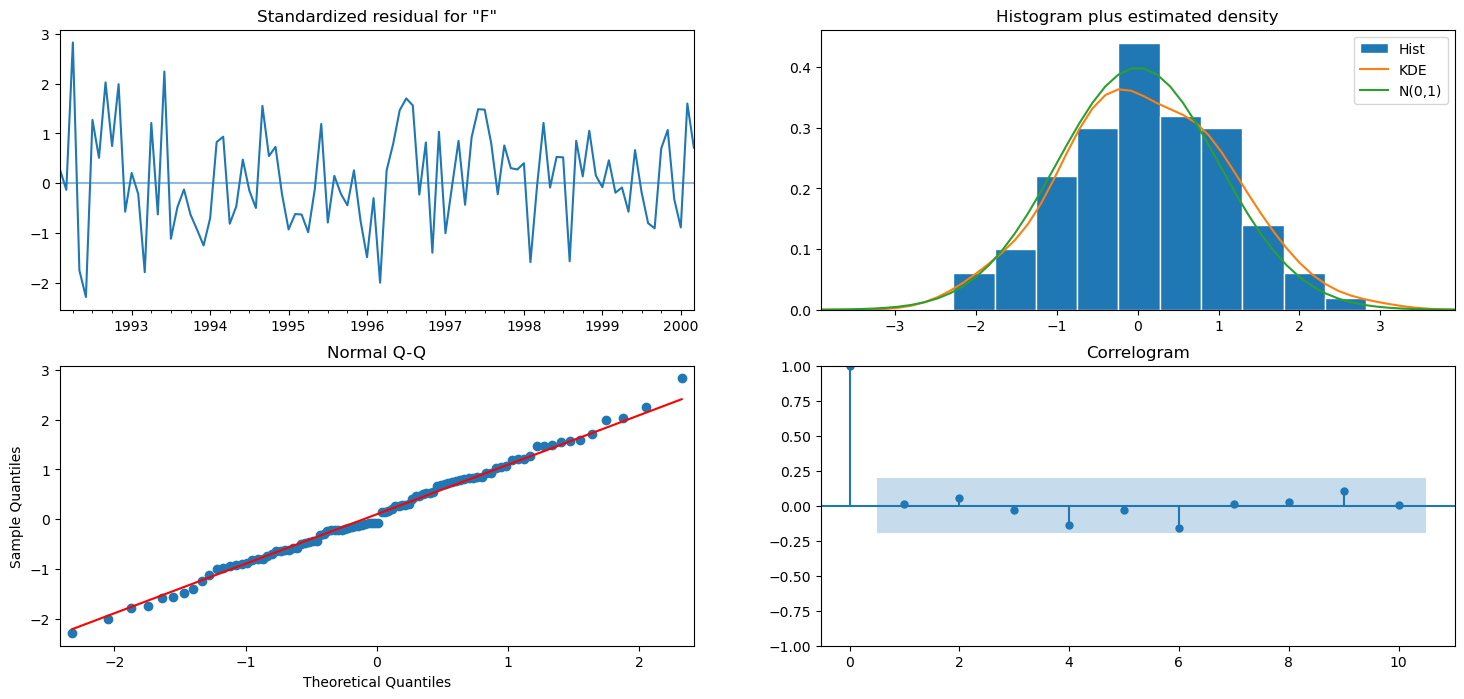

In [22]:
# Residual Check
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [23]:
# As we can see from the image above, the residuals are uncorrelated,
# normal and have zero mean. Hence we can say the model is fitted well.

In [24]:
# Evaluate the model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions
predictions = results.predict(start=test.index[0], end=test.index[-1])

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print(f"RMSE: {rmse}")

RMSE: 137.55351544334854


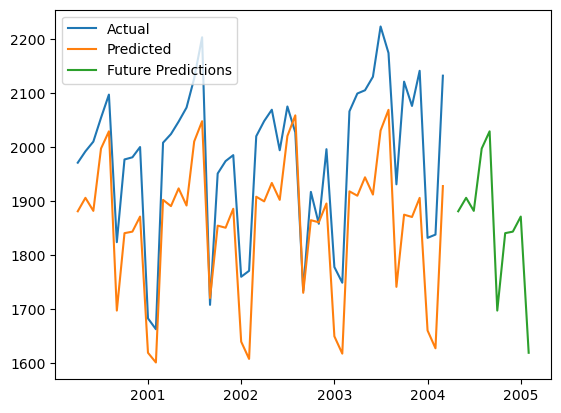

In [25]:
# Making predictions for the next 10 footfall values

future_predictions = results.forecast(steps=10)

# Plot actual vs predicted data
plt.plot(test.index, test.values, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.plot(pd.date_range(test.index[-1], periods=11, freq='M')[1:], future_predictions, label='Future Predictions')
plt.legend()
plt.show()


In [26]:
# Our forecasts show that the time series is expected to continue at a steady pace.